# CIS 5450 Final Project: Darren Chen, Melanie Chen, Vishakh Arora

<ins>Goal</ins>: \\
The overall goal of our project was to find which factors of a person are most correlated with their incidence of having asthma.

<ins>Dataset overview</ins>: \\
The Behavioral Risk Factor Surveillance System (BRFSS) is a joint initiative involving all US states, participating territories, and the Centers for Disease Control and Prevention (CDC).

Its purpose is to gather consistent, state-specific information on health risk behaviors, chronic ailments, access to healthcare, and usage of preventative healthcare services linked to the primary causes of death and disability in the US. BRFSS conducts surveys with individuals aged 18 and over through both mobile and landline phone-based methods. In 2020, the BRFSS evaluated various factors, including health status and healthy days, exercise, chronic health conditions, insufficient sleep, oral health, tobacco use, cancer screenings, and access to healthcare.

The datast has 270 columns and just over 400,000 rows.


<ins>Value Proposition</ins>: \\
By understanding the different determinants of diseases that will affect millions of people each year, we will be able to provide valuable insight into specific treatment plans and preventative measures people can take against such diseases. For instance, obesity has been a long time issue in America. Analyzing BMI and trying to understand factors that heavily influence one's BMI can help us understand how we can lower obesity rates and improve the health of many Americans.

Thus, our models will be able to help people by encouraging them to get a diagnosis based on other health factors.


# Imports/Setup

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd drive/MyDrive/
# fpath = '/content/drive/MyDrive/'
fpath = '/content/drive/MyDrive/Sophomore Year/CIS 5450/'

df = pd.read_csv(fpath + "brfss2020_cleaned.csv")
df.head()

,Unnamed: 0,SEQNO,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,0,2020000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,2020000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

# EDA/Preliminary Findings

### **Cleaning the Dataset**

After choosing our dataset, we first started by cleaning the raw data. We downloaded the full dataset from Kaggle to get a sense of what we would be working with and to visually see the sparsity of our data. The raw data had over 250 columns and ~400,000 rows. To narrow down what potential features we would work with and prepare the data for analysis, we started with cleaning the data.

First, we uploaded the raw data file to our shared Drive, checked the types of the dataframe, and checked how many null values were in each column. To eliminate features that didn't have enough data, we set a threshold of >=100,000 and dropped columns that had over 100,000 null entries. We then eliminated unecessary identification info and only kept the "SEQNO" column (ID number) for subject identification purposes. We then downloaded the cleaned data as a dataframe and began using this cleaned data for the rest of the project.

In [ ]:
# Downloaded the raw data from Kaggle to personal Drive in a folder called "545_Project"
df_brfss = pd.read_csv(fpath + "brfss2020_cleaned.csv")

In [ ]:
# Outputs were getting truncated so increased the max rows/colns that can be presented
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [ ]:
# To get a general sense of the structure of the data
df_brfss.info
df_brfss.isna().sum()

Unnamed: 0         0
SEQNO              0
CTELENM1      277207
PVTRESD1      277207
COLGHOUS      401935
STATERE1      277207
CELPHONE      277207
LADULT1       277207
COLGSEX       401935
NUMADULT      277216
LANDSEX       350509
NUMMEN        291536
NUMWOMEN      291536
RESPSLCT      354532
SAFETIME      124751
CTELNUM1      124751
CELLFON5      124751
CADULT1       124755
CELLSEX       124771
PVTRESD3      124752
CCLGHOUS      400979
CSTATE1       124758
LANDLINE      124752
HHADULT       124753
SEXVAR             0
GENHLTH            8
PHYSHLTH           5
MENTHLTH           5
POORHLTH      200343
HLTHPLN1           3
PERSDOC2           3
MEDCOST            3
CHECKUP1           5
EXERANY2           3
SLEPTIM1           3
CVDINFR4           6
CVDCRHD4           3
CVDSTRK3           3
ASTHMA3            3
ASTHNOW       347817
CHCSCNCR           3
CHCOCNCR           3
CHCCOPD2           5
HAVARTH4           5
ADDEPEV3           6
CHCKDNY2           6
DIABETE4           6
DIABAGE3     

In [ ]:
# Drop colns where over 100,000 entries are null
df = df_brfss.dropna(thresh=df_brfss.shape[0]-100000, axis=1)

In [ ]:
df.info
df.dtypes

Unnamed: 0      int64
SEQNO           int64
SEXVAR        float64
GENHLTH       float64
PHYSHLTH      float64
MENTHLTH      float64
HLTHPLN1      float64
PERSDOC2      float64
MEDCOST       float64
CHECKUP1      float64
EXERANY2      float64
SLEPTIM1      float64
CVDINFR4      float64
CVDCRHD4      float64
CVDSTRK3      float64
ASTHMA3       float64
CHCSCNCR      float64
CHCOCNCR      float64
CHCCOPD2      float64
HAVARTH4      float64
ADDEPEV3      float64
CHCKDNY2      float64
DIABETE4      float64
LASTDEN4      float64
RMVTETH4      float64
MARITAL       float64
EDUCA         float64
RENTHOM1      float64
CPDEMO1B      float64
VETERAN3      float64
EMPLOY1       float64
CHILDREN      float64
INCOME2       float64
WEIGHT2       float64
HEIGHT3       float64
DEAF          float64
BLIND         float64
DECIDE        float64
DIFFWALK      float64
DIFFDRES      float64
DIFFALON      float64
SMOKE100      float64
USENOW3       float64
ALCDAY5       float64
FLUSHOT7      float64
PNEUVAC4  

### **Choosing our Focus**

Looking at the features left in the cleaned BRFSS data, we decided that it would be interesting to explore BMI and Asthma, _BMI5 and _ASTHMS1, respectively.

<ins> BMI</ins>

_BMI5 is the calculated variable for body mass index (BMI). BMI is a numerical variable so its possible data values are:

*   '.' representing an unknown value
*   1 to 9999 kilograms per meter squared aka the participants' measured BMI

<ins> Asthma </ins>

_ASTHMS1 is the calculated variable for calculated variable for computed asthma status. Asthma is categorical data so its possible data values are:

*   1 for respondents with asthma currently
*   2 for respondents with former asthma
*   3 for respondents who have never had asthma
*   9 for unknown responses

## **BMI EDA**

Next, using our own intuition, we selected a few features that we believed could be related to BMI and created a correlation heat map of them. The heatmap below utilizes features:

*   _SEX (Calculated variable for calculated sex variable)
*   _AGEG5YR (Calculated variable for fourteen-level age category)
*   CHILDREN (Calculated number of children less than 18 years of age that live in respondent's household)
*   _EDUCAG (Calculated variable for level of education completed)
*   DROCDY3_ (Calculated variable for drink-occasions-per-day)
*   _RFSMOK3 (Calculated variable for adults who are current smokers)

We then began conducting an EDA to explore the correlation between features and BMI. See below for plots.

<Axes: >

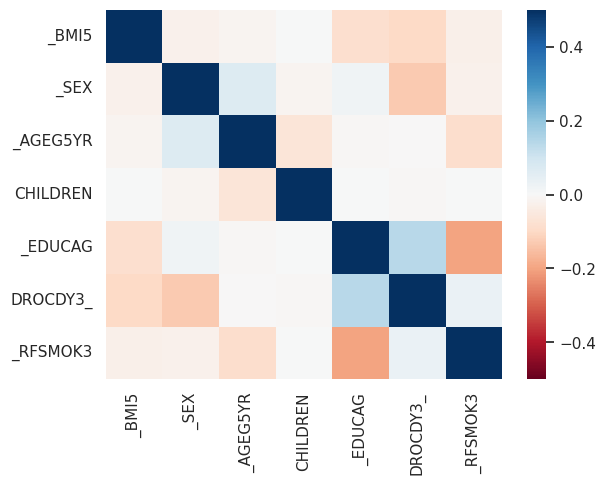

In [ ]:
# First, let's select some variables we think could be related to BMI
bmi_factors = df[["_BMI5", "_SEX", "_AGEG5YR", "CHILDREN", "_EDUCAG", "DROCDY3_", "_RFSMOK3"]].dropna()
bmi_factors["CHILDREN"] = [0 if x == 88 else x for x in bmi_factors["CHILDREN"]]
bmi_factors = bmi_factors[bmi_factors["_EDUCAG"] != 9]
bmi_factors = bmi_factors[bmi_factors["_RFSMOK3"] != 9]
bmi_factors = bmi_factors[bmi_factors["DROCDY3_"] != 900]
sns.heatmap(bmi_factors.corr(), cmap="RdBu", vmin=-0.5, vmax=0.5)

### **BMI Density Distribution**

In order to determine the viablility of using BMI as one of our target variables, we first visualized the distribution of values to see if there was enough variability to where a model would be able to predict a wide range of values. We used a KDE plot to accomplish this.

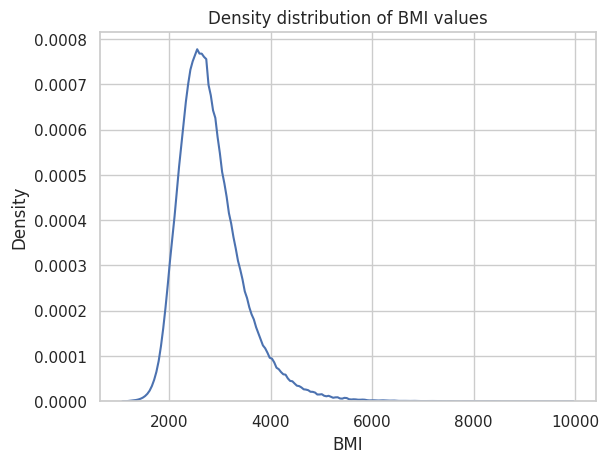

In [ ]:
sns.kdeplot(data=df, x="_BMI5", bw_adjust=0.8)
plt.title('Density distribution of BMI values')
plt.xlabel('BMI')
plt.show()

A majority of the values seem to be clustered in the 2000 to 4000 range, a good initial sign for using BMI as predicting a range of 2000 values is meaningful.

### **BMI EDA Plots**

***Histogram for BMI***

<ipython-input-119-fc91d284b5cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bmi = df[["_BMI5"]].dropna()[df["_BMI5"] < 6000]
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:163: UserWarning: The label '_BMI5' of <matplotlib.patches.Patch object at 0x7f19c35eabb0> starts with '_'. It is thus excluded from the legend.
  ax_obj.legend(handles, labels, title=self.variables["hue"], **legend_kws)


Text(0.5, 1.0, 'Overall BMI')

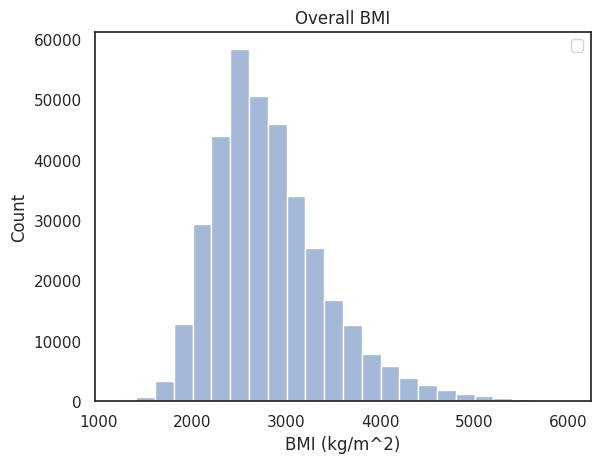

In [ ]:
# filtering out outliers
df = pd.read_csv(fpath + "brfss2020_cleaned.csv")
bmi = df[["_BMI5"]].dropna()[df["_BMI5"] < 6000]
sns.set_theme(style="white")
sns.histplot(data=bmi, binwidth=200)
plt.xlabel("BMI (kg/m^2)")
plt.title("Overall BMI")

***BMI for Individuals who Exercised vs Individuals who Didn't Exercise***

Text(0.5, 1.0, 'BMI vs exercise')

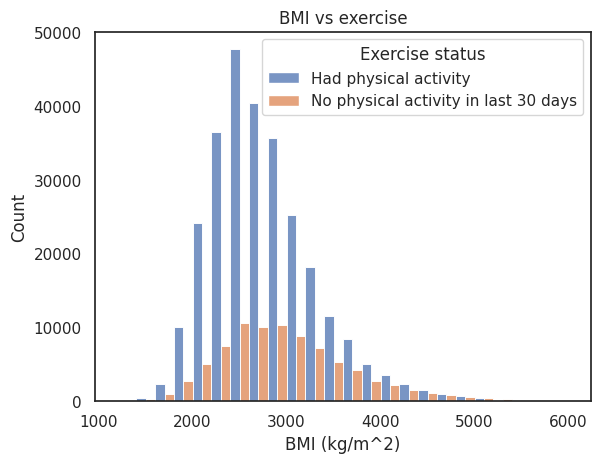

In [ ]:
bmi_exercise = df[["_BMI5", "_TOTINDA"]].dropna()
bmi_exercise = bmi_exercise[bmi_exercise["_BMI5"] < 6000]
bmi_exercise = bmi_exercise[bmi_exercise["_TOTINDA"] != 9]
#relabeling _TOTINDA
labels = {1: "Had physical activity",
          2:"No physical activity in last 30 days"}
bmi_exercise["_TOTINDA"] = [labels[x] for x in bmi_exercise["_TOTINDA"]]
bmi_exercise = bmi_exercise.rename(columns={"_TOTINDA":"Exercise status"})
sns.set_theme(style="white")
sns.histplot(data=bmi_exercise, x="_BMI5", hue="Exercise status", multiple="dodge", binwidth=200)
plt.xlabel("BMI (kg/m^2)")
plt.title("BMI vs exercise")

***Average BMI vs Race***

Text(0.5, 1.0, 'Average BMI vs race')

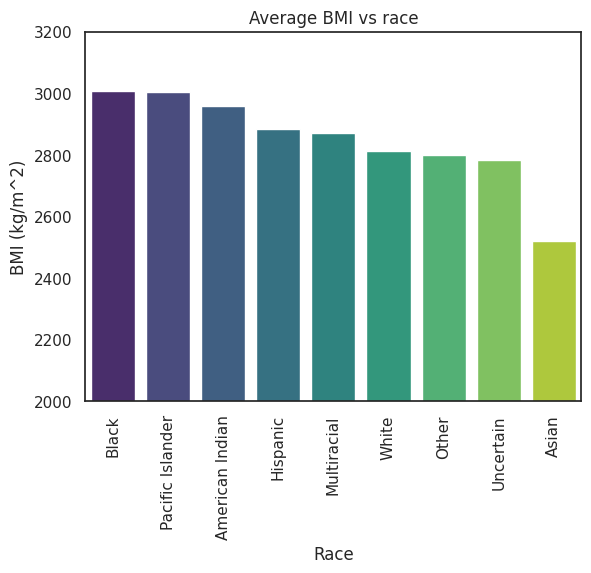

In [ ]:
bmi_race = df[["_BMI5", "_RACE"]].dropna()
labels = {1: "White",
          2: "Black",
          3: "American Indian",
          4: "Asian",
          5: "Pacific Islander",
          6: "Other",
          7: "Multiracial",
          8: "Hispanic",
          9: "Uncertain"}
bmi_race["_RACE"] = [labels[x] for x in bmi_race["_RACE"]]
bmi_race = bmi_race.groupby("_RACE")["_BMI5"].mean().reset_index()
bmi_race = bmi_race.sort_values(by="_BMI5", ascending=False)
sns.set_theme(style="white")
sns.barplot(data=bmi_race, x="_RACE", y="_BMI5", palette="viridis")
plt.xticks(rotation=90)
plt.ylim(2000, 3200)
plt.xlabel("Race")
plt.ylabel("BMI (kg/m^2)")
plt.title("Average BMI vs race")

## **Asthma EDA**

After our BMI EDA, we conducted an EDA for studying Asthma. We first made a count plot to determine the distribution of asthma categories across the data.

Then, we created a correlation matrix of all features and Asthma. We found a subset of features that had an over 0.1 correlation with Asthma and then put those features in another correlation heat map to determine their relationship with Asthma.

We then continued to make plots with various features to further explore their relationship with the Asthma variable.

***Asthma vs BMI***

After detemining that BMI might not be the best target variable, we wanted to determine if it could be used as a potential determinant for our chosen variable, asthma.

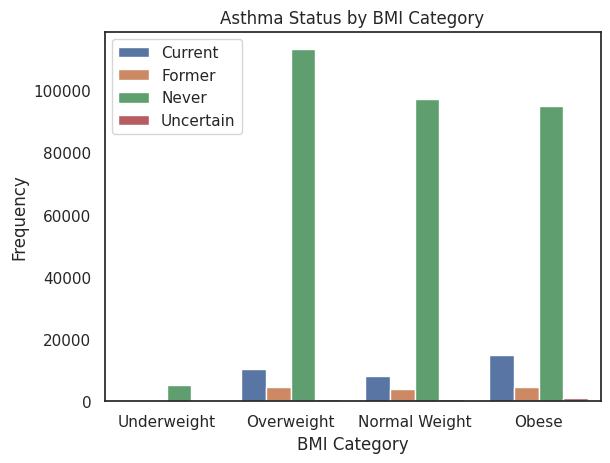

In [ ]:
df_bmi_asthma = df[['_BMI5CAT', '_ASTHMS1']].dropna()

asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}

bmi_mapping = {1: "Underweight",
          2: "Normal Weight",
          3:"Overweight",
          4:"Obese",
          '.': 'Don’t know/Refused/Missing'}

df_bmi_asthma['_ASTHMS1'] = df_bmi_asthma['_ASTHMS1'].map(asthma_mapping)
df_bmi_asthma['_BMI5CAT'] = df_bmi_asthma['_BMI5CAT'].map(bmi_mapping)

sns.countplot(x='_BMI5CAT', hue='_ASTHMS1', data=df_bmi_asthma)
plt.ylabel("Frequency")
plt.xlabel("BMI Category")
plt.title("Asthma Status by BMI Category")
plt.legend()
plt.show()

***Studying Correlation Matrix for Asthma***

In [ ]:
corr_with_asthma = corr_matrix['_ASTHMS1'].sort_values(ascending=False)
highly_correlated = corr_with_asthma[corr_with_asthma > .1]

# Print the highly correlated features
print("Features with correlation coefficient greater than 0.1 with Asthma:\n")
print(highly_correlated)

Features with correlation coefficient greater than 0.1 with Asthma:

_ASTHMS1    1.000000
ASTHMA3     0.768627
_CASTHM1    0.320122
CHCCOPD2    0.165277
ADDEPEV3    0.132105
CVDSTRK3    0.121286
HAVARTH4    0.115189
CHCKDNY2    0.102383
Name: _ASTHMS1, dtype: float64


***Count Plot of Asthma Status***

Text(0.5, 1.0, 'Asthma status frequency plot')

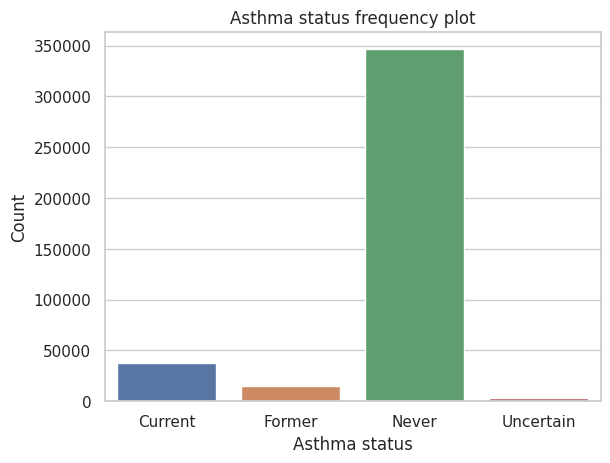

In [ ]:
asthma = df[["_ASTHMS1"]].dropna()
# relabeling numbers to status
status = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}
asthma["_ASTHMS1"] = [status[x] for x in asthma["_ASTHMS1"]]
sns.set_theme(style="whitegrid")
sns.countplot(data=asthma, x="_ASTHMS1")
plt.ylabel("Count")
plt.xlabel("Asthma status")
plt.title("Asthma status frequency plot")

***Smoking Frequency vs. Asthma***

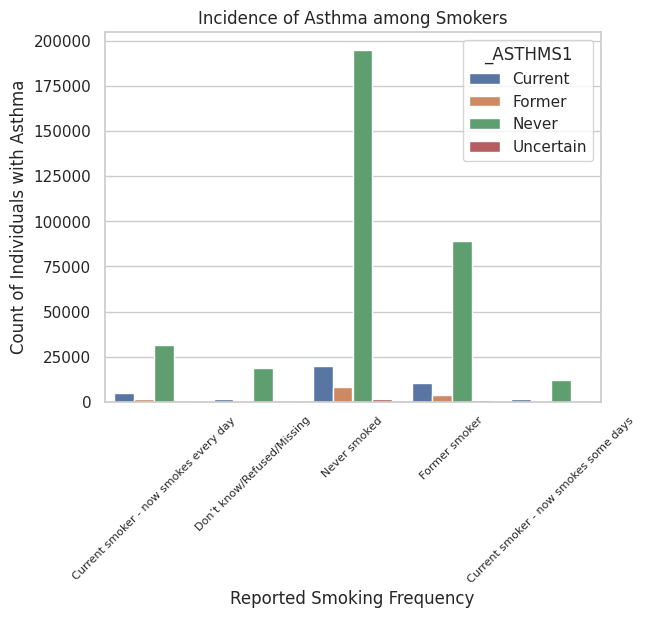

In [ ]:
# Mapping values for _SMOKER3 and ASTHMS1 according to their descriptions
smoker_mapping = {1: "Current smoker - now smokes every day",
                  2: "Current smoker - now smokes some days",
                  3: "Former smoker",
                  4: "Never smoked",
                  9: "Don’t know/Refused/Missing"}

asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}

# Creating a copy of the dataframe with mapped values for _SMOKER3 and ASTHMS1
df_mapped = df[["_SMOKER3", "_ASTHMS1"]].dropna()
df_mapped['_SMOKER3'] = df_mapped['_SMOKER3'].map(smoker_mapping)
df_mapped['_ASTHMS1'] = df_mapped['_ASTHMS1'].map(asthma_mapping)

sns.set(style="whitegrid")
sns.countplot(x="_SMOKER3", hue="_ASTHMS1", data=df_mapped)
plt.xticks(rotation=45, fontsize=8)
plt.title("Incidence of Asthma among Smokers")
plt.xlabel("Reported Smoking Frequency")
plt.ylabel("Count of Individuals with Asthma")
plt.show()

***Violin Plot for Asthma and HAVARTH4 (having some form of arthritis)***

Text(0.5, 1.0, 'Asthma Status Violin Plot')

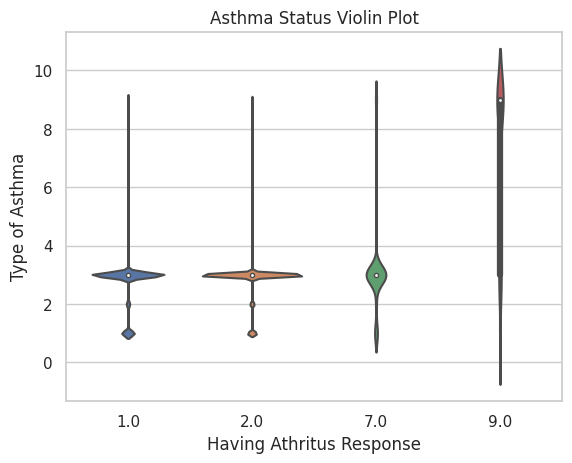

In [ ]:
asthma_arth = df[["_ASTHMS1", "HAVARTH4"]].dropna()

asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}

arth_mapping = {1: "Yes",
          2: "Former",
          7:"Unsure",
          9:"Refused"}

g = sns.violinplot(data=asthma_arth, x="HAVARTH4", y="_ASTHMS1")
plt.ylabel("Type of Asthma")
plt.xlabel("Having Athritus Response")
plt.title("Asthma Status Violin Plot")

***Box Plot for Asthma and CASTHNO2 (child asthma)***

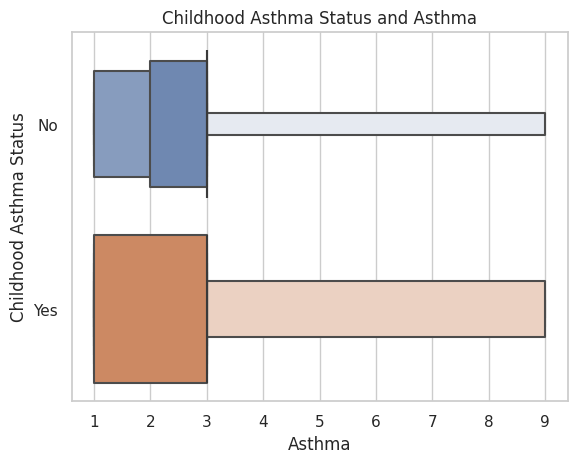

In [ ]:
asthma_casthma = df[["_ASTHMS1", "CASTHNO2"]].dropna()
casthma_mapping = {1: "Yes",
          2: "No",
          3: "Unsure",
          4: "Refused"}
asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}
sns.boxenplot(data=df, x=df['_ASTHMS1'], y=df['CASTHNO2'].map(casthma_mapping), scale='linear')
plt.title("Childhood Asthma Status and Asthma")
plt.ylabel("Childhood Asthma Status")
plt.xlabel("Asthma")
plt.show()

***Asthma Incidence by Sex***

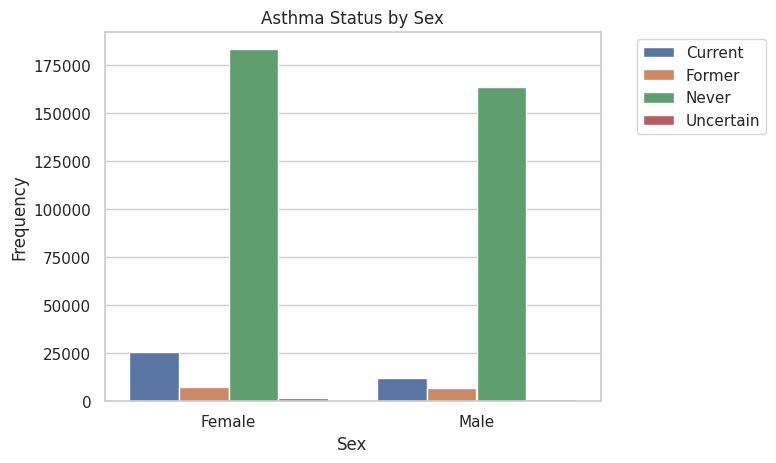

In [ ]:
asthma_race = df[["_ASTHMS1", "_SEX"]].dropna()

sex_mapping = {1: "Male",
          2: "Female"}

asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}

asthma_race['_ASTHMS1'] = asthma_race['_ASTHMS1'].map(asthma_mapping)
asthma_race['_SEX'] = asthma_race['_SEX'].map(sex_mapping)

sns.countplot(x='_SEX', hue='_ASTHMS1', data=asthma_race)
plt.title("Asthma Status by Sex")
plt.ylabel("Frequency")
plt.xlabel("Sex")
plt.legend(bbox_to_anchor=(1.35, 1.0), loc='upper right')
plt.show()

***Scatter Plot for Asthma and CVDSTRK3 (ever had a stroke)***

Text(0.5, 1.0, 'Boxplot of CVDSTRK3 by Asthma Status')

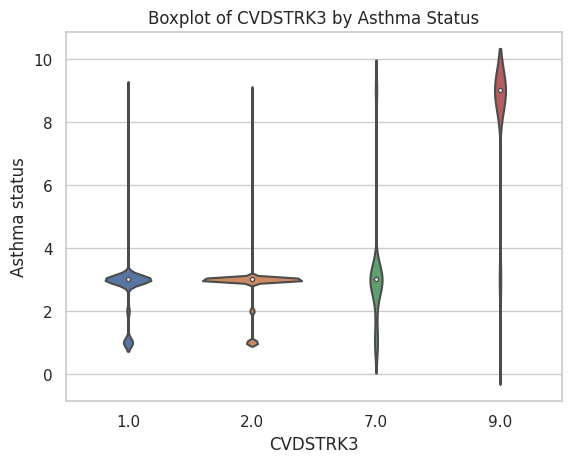

In [ ]:
asthma_stroke = df[['CVDSTRK3', '_ASTHMS1']].dropna()

stroke_mapping = {1: "Yes",
          2: "No",
          7: "Unsure",
          9: "Refused"}

asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}

sns.violinplot(data=asthma_stroke, x="CVDSTRK3", y="_ASTHMS1")
plt.xlabel('CVDSTRK3')
plt.ylabel('Asthma status')
plt.title('Boxplot of CVDSTRK3 by Asthma Status')

***Catplot between Asthma and ADDEPV3***

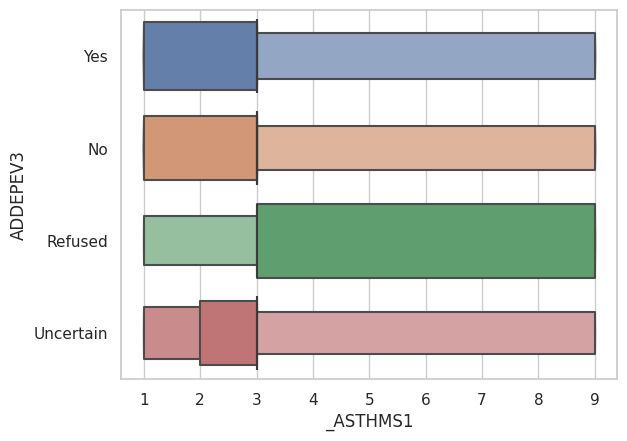

In [ ]:
# Mapping numbers to categorical variables
asthma_mapping = {1: "Current",
          2: "Former",
          3:"Never",
          9:"Uncertain"}

depression_mapping = {1: "Yes",
          2: "No",
          9:"Refused",
          7:"Uncertain"}

sns.boxenplot(data=df, x=df['_ASTHMS1'], y=df['ADDEPEV3'].map(depression_mapping), scale='linear')
plt.show()

***Violin Plot between Asthma and Age***

Text(0.5, 1.0, 'Asthma Status Violin Plot')

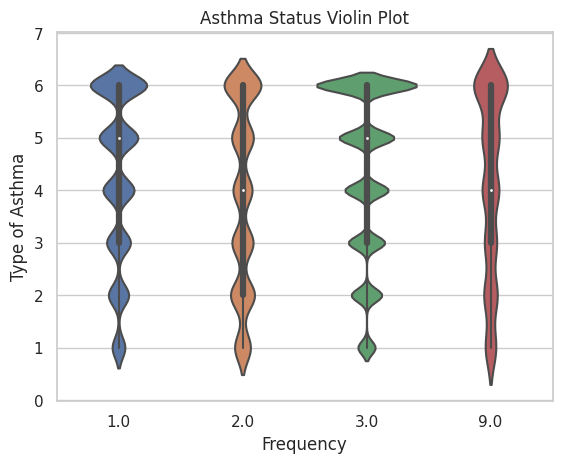

In [ ]:
asthma_age = df[["_ASTHMS1", "_AGE_G"]].dropna()
sns.violinplot(data=asthma_age, x="_ASTHMS1", y="_AGE_G")
plt.ylabel("Type of Asthma")
plt.xlabel("Frequency")
plt.title("Asthma Status Violin Plot")

From our EDA, we took away a couple key conclusions:
1. Sex, coronary heart disease, and depression are three big determinants of asthma
2. As asthma incidence and many of the variables involved were categorical, we must use models such as logistic regressors and classifiers to take these factors into account
3. From our violin plots, we gathered that there is a decent amount of variance in the data that is evenly spread out, as there were no
tall spikes in our violin plots
4. For most of the categorical variables, a decent amount of values in the dataset were uncertain or not reported, impacting how informative our plots were. In our models, these values will be removed to ensure that only the most useful data is accounted for

### **Creating the Train and Test Datasets**

Next, we had to choose which features to include in our datasets, as well as do some final cleaning to ensure the data was ready for modeling. We decided that we would keep any variable that had a > 0.1 or < -0.1 correlation with our target.

<Axes: >

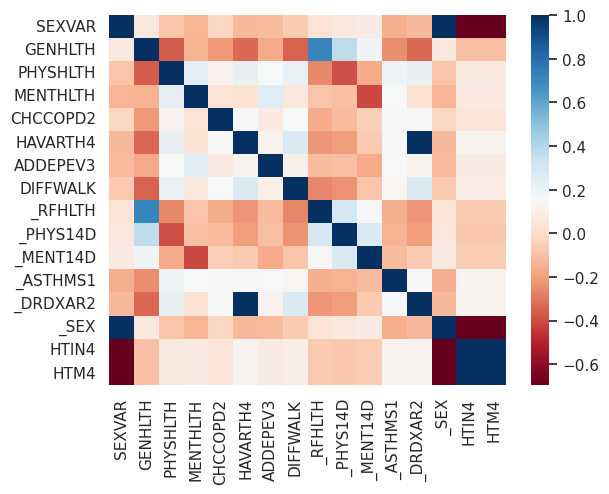

In [ ]:
df = pd.read_csv(fpath + "brfss2020_cleaned.csv")

# filtering to just have entries with current (1) and never (3) as the asthma status
df = df[(df["_ASTHMS1"] == 1) | (df["_ASTHMS1"] == 3)]
df["_ASTHMS1"] = [0 if x == 1 else 1 for x in df["_ASTHMS1"]]

# balancing out number of samples in each class
df_status_0 = df[df["_ASTHMS1"] == 0]
df_status_1 = df[df["_ASTHMS1"] == 1]
df_status_1_sampled = df_status_1.sample(n=len(df_status_0), random_state=1)
df_status_1_sampled
df_balanced = pd.concat([df_status_0, df_status_1_sampled]).reset_index(drop=True)

# ensuring that there are no nulls moving forward
df_filtered = df_balanced.dropna(axis="columns", thresh=70000)
df_filtered = df_filtered.dropna(axis="rows")

# finding correlation matrix
corr = df_filtered.corr()
corr_asthma = corr[["_ASTHMS1"]]

# dropping related variables to _ASTHMS1 with correlation -1, 1
corr_asthma = corr_asthma.drop(["_LTASTH1", "_CASTHM1", "ASTHMA3"], axis=0)

# keeping only variables with > 0.1 or < -0.1 correlation
features = corr_asthma[(corr_asthma["_ASTHMS1"] > 0.1) | (corr_asthma["_ASTHMS1"] < -0.1)]
final_df = df_filtered[features.index]

# finding variables with colinearity
import seaborn as sns

sns.heatmap(final_df.corr(), cmap="RdBu")

After selecting the features that met the above criterion, we then removed any colinear variables. The heatmap above shows the pairwise correlations between all the features we initially selected. We removed one feature from each feature pair that had a correlation higher than 0.5.

In [ ]:
# dropping variables with high correlation
final_df = final_df.drop(["GENHLTH", "SEXVAR", "HAVARTH4", "HTM4", "MENTHLTH", "PHYSHLTH"], axis=1)

# removing bad status entries
final_cleaned_df = final_df[
    (final_df["CHCCOPD2"] < 7)
    & (final_df["ADDEPEV3"] < 7)
    & (final_df["DIFFWALK"] < 7)
    & (final_df["_RFHLTH"] < 9)
    & (final_df["_PHYS14D"] < 9)
    & (final_df["_MENT14D"] < 9)
]

# creating the training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_cleaned_df.drop("_ASTHMS1", axis=1), final_cleaned_df["_ASTHMS1"], test_size=0.1, random_state=42)

Now that we have training and testing data, it's time for modeling!

# Model 1: Logistic Regression

For our baseline, we chose logistic regression as this was the simplest classification model we could think of. The performance metrics are shown below. Our hope was that our advanced models would be able to significantly beat this benchmark.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training accuracy: " + str(round(train_acc, 4)))
print("Training precision: " + str(round(train_precision, 4)))
print("Training recall: " + str(round(train_recall, 4)))
print("Training f1: " + str(round(train_f1, 4)))
print("")
print("Testing accuracy: " + str(round(test_acc, 4)))
print("Testing precision: " + str(round(test_precision, 4)))
print("Testing recall: " + str(round(test_recall, 4)))
print("Testing f1: " + str(round(test_f1, 4)))

Training accuracy: 0.6547
Training precision: 0.6268
Training recall: 0.7662
Training f1: 0.6895

Testing accuracy: 0.6521
Testing precision: 0.6253
Testing recall: 0.7656
Testing f1: 0.6883


# Model 2: PCA + Logistic Regression

For our first advanced model, we decided to use PCA + logistic regression. We wanted to see if applying PCA before running logistic regression performed better than just running logistic regression on its own. First, we needed to find the optimal number of PCA components to use.

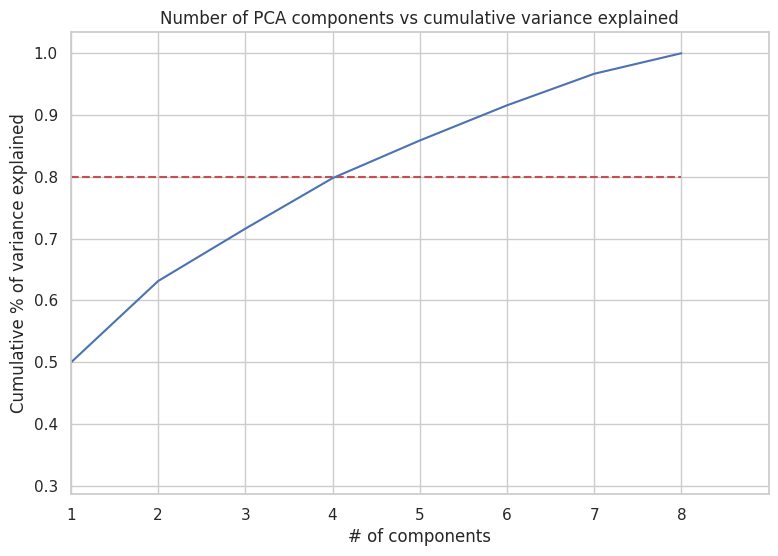

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# First, we figure out the optimal number of components to keep
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA()
pca.fit(X_train_scaled)

# Plotting the variance explained vs number of components
cum_evr = []
curr = 0
for x in pca.explained_variance_ratio_:
  curr += x
  cum_evr.append(curr)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xlim(1, len(cum_evr))
ax.hlines(y=0.8, xmin=1, xmax=len(cum_evr)-1, color="r", linestyle="dashed")
ax.set_xticks(range(1, len(cum_evr)))
ax.plot(cum_evr)
plt.xlabel("# of components")
plt.ylabel("Cumulative % of variance explained")
plt.title("Number of PCA components vs cumulative variance explained")
plt.show()

Given that 4 components gave us a cumulative 80% of variance explained, we decided on using n_components=4.

In [ ]:
# retraining on number of components explaining 80% of variance
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# running logistic regression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_pca, y_train)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

train_acc = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training accuracy: " + str(round(train_acc, 4)))
print("Training precision: " + str(round(train_precision, 4)))
print("Training recall: " + str(round(train_recall, 4)))
print("Training f1: " + str(round(train_f1, 4)))
print("")
print("Testing accuracy: " + str(round(test_acc, 4)))
print("Testing precision: " + str(round(test_precision, 4)))
print("Testing recall: " + str(round(test_recall, 4)))
print("Testing f1: " + str(round(test_f1, 4)))

Training accuracy: 0.6462
Training precision: 0.6263
Training recall: 0.7264
Training f1: 0.6726

Testing accuracy: 0.6424
Testing precision: 0.6235
Testing recall: 0.7257
Testing f1: 0.6707


As seen in the results, using PCA with n_components=4 did not lead to better performance compared to just running logistics regression. To explore the possibility that another value of n_components may be better, we then varied the number of components we kept and looked at how the model performed.

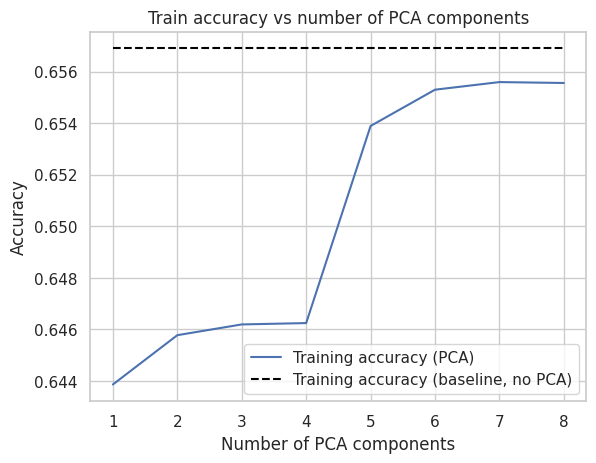

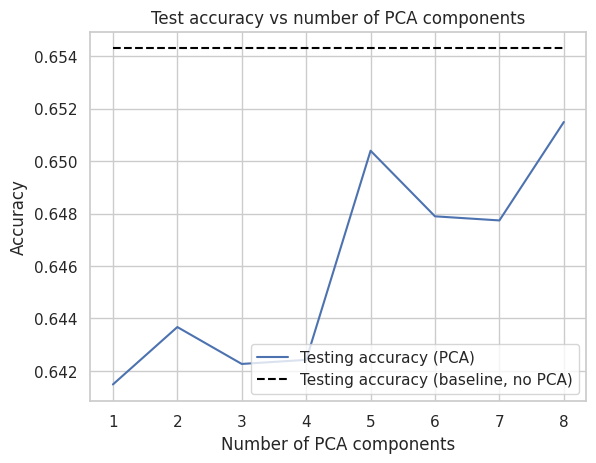

In [ ]:
# comparing train and test accuracy vs number of components
train_accs = []
test_accs = []
for n in range(1, 9):
  pca = PCA(n_components=n)
  pca.fit(X_train_scaled)
  X_train_pca = pca.transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_pca, y_train)
  y_train_pred = clf.predict(X_train_pca)
  y_test_pred = clf.predict(X_test_pca)
  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

plt.plot(range(1, 9), train_accs, label="Training accuracy (PCA)")
plt.plot(range(1, 9), [0.6569] * 8, linestyle="dashed", color="black", label="Training accuracy (baseline, no PCA)")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("Train accuracy vs number of PCA components")
plt.legend(loc="lower right")
plt.show()

plt.plot(range(1, 9), test_accs, label="Testing accuracy (PCA)")
plt.plot(range(1, 9), [0.6543] * 8, linestyle="dashed", color="black", label="Testing accuracy (baseline, no PCA)")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("Test accuracy vs number of PCA components")
plt.legend(loc="lower right")
plt.show()

Unfortunately, no matter the number of PCA components we kept, we were not able to beat the baseline. This wasn't too unexpected however, as the number of features we were using wasn't very high. PCA is really useful as a dimension reduction technique, which is why it can oftentimes improve performance on tasks such as binary classification when the number of features is really high. In this case, using PCA probably only made a marginal difference since our feature space already had relatively low dimension.

# Model 3: Random Forest Classifier

For our second advanced model, we wanted to use a random forest classifier as these tend to perform really well on classification tasks. First, we needed to find the optimal number of trees to include in the random forest.

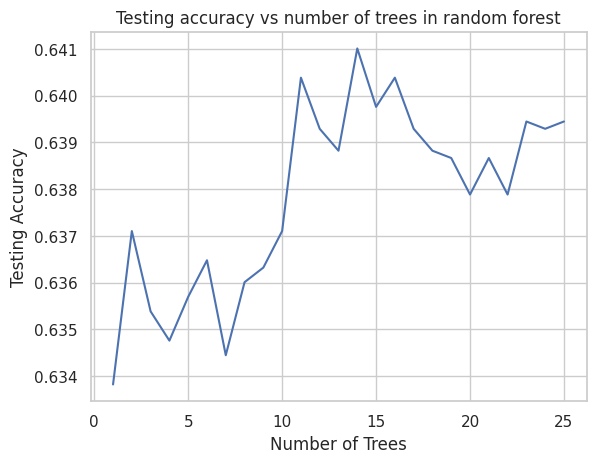

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# First, we find an optimal value for n_estimators
scores = []
for n in range(1, 26):
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 26), scores)
plt.xlabel('Number of Trees')
plt.ylabel('Testing Accuracy')
plt.title("Testing accuracy vs number of trees in random forest")
plt.show()

Given that the test accuracy spiked somewhere around 15 trees, we decided on setting n_estimators = 15. Next, we wanted to determine what the optimal max_depth was, given our choice of n_estimators.

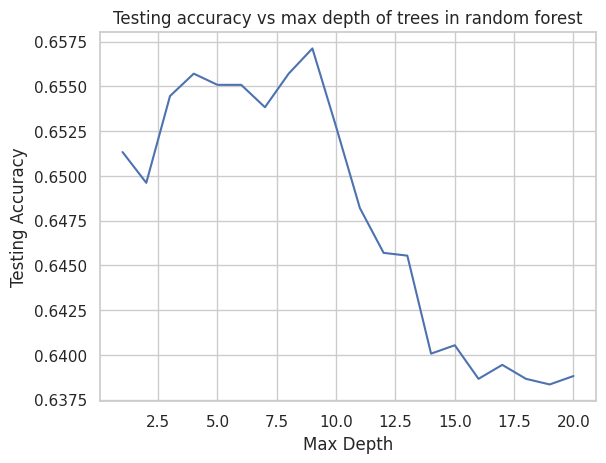

In [ ]:
# looks like 15 is the best number of trees to use
# Now, we want to find the optimal value for max_depth
scores = []
for d in range(1, 21):
  rfc = RandomForestClassifier(n_estimators=15, max_depth=d, random_state=42)
  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), scores)
plt.xlabel('Max Depth')
plt.ylabel('Testing Accuracy')
plt.title("Testing accuracy vs max depth of trees in random forest")
plt.show()

We saw that a max depth of 9 looked to be optimal. With the hyperparameters set, we trained our random forest classifier one last time and evaluated its performance.

In [ ]:
# looks like 9 is the best max depth to use. Now, to train our final random forest classifier
# using these optimized values
rfc = RandomForestClassifier(n_estimators=15, max_depth=9, random_state=42)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training accuracy: " + str(round(train_acc, 4)))
print("Training precision: " + str(round(train_precision, 4)))
print("Training recall: " + str(round(train_recall, 4)))
print("Training f1: " + str(round(train_f1, 4)))
print("")
print("Testing accuracy: " + str(round(test_acc, 4)))
print("Testing precision: " + str(round(test_precision, 4)))
print("Testing recall: " + str(round(test_recall, 4)))
print("Testing f1: " + str(round(test_f1, 4)))

Training accuracy: 0.6661
Training precision: 0.6427
Training recall: 0.7493
Training f1: 0.6919

Testing accuracy: 0.6571
Testing precision: 0.6355
Testing recall: 0.7425
Testing f1: 0.6849


As seen in the above results, the random forest classifier achieved only margininally better training and testing accuracy compared to logistic regression. While this came as somewhat of a surprise, we kept moving forward as we weren't exactly sure why this was the case.

Next, we wanted to look at feature importance to determine which features played the biggest role in predicting asthma stats. We calculated feature importance by calculating the mean decrease in impurity for each feature, as well as the standard deviation.

Text(0.5, 0, 'Feature')

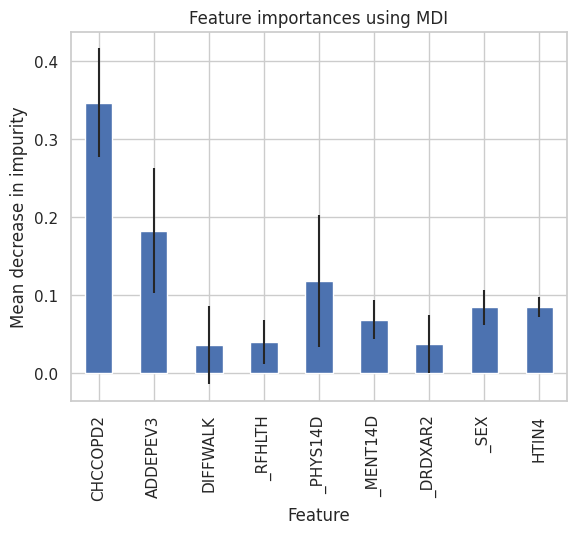

In [ ]:
# Let's look at feature importance
import numpy as np

importances = rfc.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Feature")

The top three most important features in predicting asthma status were CHCCOPD2 (having chronic health conditions such as bronchitis), ADDEPEV3 (having a depressive disorder), and _PHYS14D (level of physical activity). While it was unsurprising to us that the first and third features were significant in predicting asthma status, we thought it was very interesting that depression and mental health also served as an important predictor.

# Model 4: Neural Network

For our last advanced model, we wanted to use a simple neural network with 1-2 layers. After experimenting with both, we decided on a 2 layer model. First, we wrote custom classes for our models and datasets.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# simple neural network with two hidden layers
class CustomNet2(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(9, 256)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(256, 128)
    self.relu2 = nn.ReLU()
    self.out = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.out(x)
    x = self.sigmoid(x)
    return x

# simple neural network with one hidden layer
class CustomNet1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(9, 128)
    self.relu = nn.ReLU()
    self.out = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc(x)
    x = self.relu(x)
    x = self.out(x)
    x = self.sigmoid(x)
    return x

# creating custom dataset and dataloader
from torch.utils.data import Dataset, DataLoader

class AsthmaDataset(Dataset):
  def __init__(self, df, labels):
    self.df = df
    self.labels = labels.reset_index(drop=True)

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    return np.array(self.df[idx, :]), self.labels[idx]

train_dataset = AsthmaDataset(X_train_scaled, y_train)
test_dataset = AsthmaDataset(X_test_scaled, y_test)
train_loader = DataLoader(train_dataset, batch_size=2048*16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Then, we created some helper functions to be used in the main training loop.

In [ ]:
# defining model, optimizer, and loss_fn
model = CustomNet2()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.BCELoss()

# function to train one epoch
def test_one_epoch(epoch_index):
  preds = []
  trues = []
  for i, data in enumerate(test_loader):
    inputs, labels = data
    outputs = model(inputs.to(torch.float32))
    predictions = outputs.round()
    preds += predictions
    trues += labels
  preds = [x.item() for x in preds]
  trues = [x.item() for x in trues]
  accuracy = accuracy_score(trues, preds)
  print("Testing accuracy for epoch " + str(epoch_index) + ": " + str(round(accuracy, 4)))
  return round(accuracy, 4)


def train_one_epoch(epoch_index):
  preds = []
  trues = []
  total_loss = 0
  count = 0
  for i, data in enumerate(train_loader):
    count += 1
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs.to(torch.float32))
    outputs = outputs.flatten()
    loss = loss_fn(outputs, labels.to(torch.float32))
    total_loss += loss
    loss.backward()
    optimizer.step()
    predictions = outputs.round()
    preds += predictions
    trues += labels
  preds = [x.item() for x in preds]
  trues = [x.item() for x in trues]
  accuracy = accuracy_score(trues, preds)
  print("Training loss per batch for epoch " + str(epoch_index) + ": " + str(round(total_loss.item() / count, 4)))
  print("Training accuracy for epoch " + str(epoch_index) + ": " + str(round(accuracy, 4)))
  return round(total_loss.item(), 4), round(accuracy, 4)

Finally, we created the main training loop.

In [ ]:
# training loop
losses = []
train_accs = []
test_accs = []
epochs = 50
for epoch in range(epochs):
  model.train(True)
  loss, train_acc = train_one_epoch(epoch)
  model.train(False)
  test_acc = test_one_epoch(epoch)
  losses.append(loss)
  train_accs.append(train_acc)
  test_accs.append(test_acc)
  print("")

Training loss per batch for epoch 0: 0.7141
Training accuracy for epoch 0: 0.408
Testing accuracy for epoch 0: 0.4181

Training loss per batch for epoch 1: 0.7119
Training accuracy for epoch 1: 0.4138
Testing accuracy for epoch 1: 0.4325

Training loss per batch for epoch 2: 0.7083
Training accuracy for epoch 2: 0.4301
Testing accuracy for epoch 2: 0.4558

Training loss per batch for epoch 3: 0.7036
Training accuracy for epoch 3: 0.458
Testing accuracy for epoch 3: 0.4959

Training loss per batch for epoch 4: 0.6982
Training accuracy for epoch 4: 0.4994
Testing accuracy for epoch 4: 0.5242

Training loss per batch for epoch 5: 0.6926
Training accuracy for epoch 5: 0.5234
Testing accuracy for epoch 5: 0.5392

Training loss per batch for epoch 6: 0.687
Training accuracy for epoch 6: 0.5354
Testing accuracy for epoch 6: 0.5439

Training loss per batch for epoch 7: 0.6815
Training accuracy for epoch 7: 0.5415
Testing accuracy for epoch 7: 0.5799

Training loss per batch for epoch 8: 0.6762

Once the model finished training, we graphed its performance over the training process.

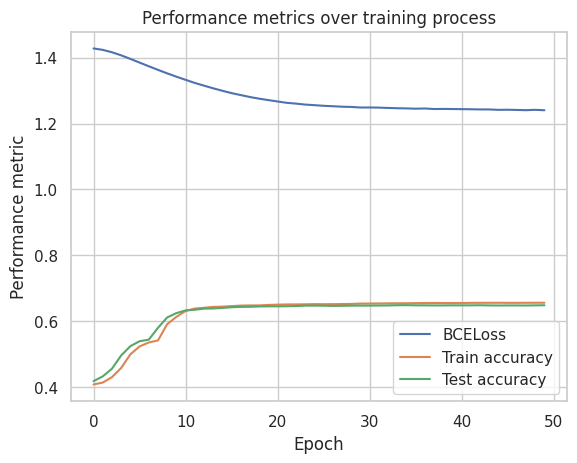

In [ ]:
# plotting performance metrics over training process
plt.plot(losses, label="BCELoss")
plt.plot(train_accs, label="Train accuracy")
plt.plot(test_accs, label="Test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Performance metric")
plt.title("Performance metrics over training process")
plt.legend()
plt.show()

Interestingly, even though the training process lasted for 50 epochs, the model seemed to have converged around 25 epochs as that's around when the loss stopped going down. This gave us a hypothesis as to why our other advanced models didn't perform as well as expected, namely, that it might have been an issue with the problem itself and not the models. Since even a neural network was not able to improve performance beyond a certain point, we felt that there might just be a cap as to how well any model could predict asthma status from the features we selected. In addition to plotting these metrics during the training process, we also computed performance metrics after training had finished.

In [ ]:
# performance metrics for neural net
preds = []
trues = []
for i, data in enumerate(train_loader):
  inputs, labels = data
  outputs = model(inputs.to(torch.float32))
  outputs = outputs.flatten()
  predictions = outputs.round()
  preds += predictions
  trues += labels
preds = [x.item() for x in preds]
trues = [x.item() for x in trues]

train_acc = accuracy_score(trues, preds)
train_precision = precision_score(trues, preds)
train_recall = recall_score(trues, preds)
train_f1 = f1_score(trues, preds)

preds = []
trues = []
for i, data in enumerate(test_loader):
  inputs, labels = data
  outputs = model(inputs.to(torch.float32))
  outputs = outputs.flatten()
  predictions = outputs.round()
  preds += predictions
  trues += labels
preds = [x.item() for x in preds]
trues = [x.item() for x in trues]

test_acc = accuracy_score(trues, preds)
test_precision = precision_score(trues, preds)
test_recall = recall_score(trues, preds)
test_f1 = f1_score(trues, preds)

print("Training accuracy: " + str(round(train_acc, 4)))
print("Training precision: " + str(round(train_precision, 4)))
print("Training recall: " + str(round(train_recall, 4)))
print("Training f1: " + str(round(train_f1, 4)))
print("")
print("Testing accuracy: " + str(round(test_acc, 4)))
print("Testing precision: " + str(round(test_precision, 4)))
print("Testing recall: " + str(round(test_recall, 4)))
print("Testing f1: " + str(round(test_f1, 4)))

Training accuracy: 0.6561
Training precision: 0.6357
Training recall: 0.7324
Training f1: 0.6806

Testing accuracy: 0.6484
Testing precision: 0.6295
Testing recall: 0.7272
Testing f1: 0.6749


Like with the other advanced models we tested, the neural network was not able to perform significantly better than logistic regression.

# Challenges We Faced

Initially in our project proposal we anticipated the following challenges:

"Some anticipated obstacles and challenges with this project is being mindful of the storage and memory being used when working with such a large dataset. It is important to consider the most efficient ways to perform operations and queries since we will be using large data that can take some time to run. Another obstacle we may encounter is lack of data or holes in the data for certain indicators. We will need to clean and filter the dataset to prevent processing any null or empty data. If there is limited data for some indicators, we may have to eliminate them entirely in order to keep the data consistent."


While conducting this project, we ran into multiple challenges. First, we ran into some trouble performing an EDA for Asthma. When we tried visualizing the data with different features and plots like sns.pairplot etc, we found trouble working with the fact that Asthma was a categorical variable and wasn't numeric. Our data may have been sparse and did not have enough data to produce good results in our EDA, so we struggled to get well-rounded conclusions from our EDA. However, we worked around it by trying different plots and ended up gaining valuable information from our EDA.


Then, we ran into some additional unanticipated challenges while modeling. The main issue we faced was poor initial performance on the neural network. During our first attempts at training, our loss over the training set stayed roughly the exact same even after 50 epochs. After trying various things which didn't lead to any improvements such as switching loss functions, changing the network architecture, tuning hyperparameters, and changing the optimizer, we hypothesized that our issue might've been due to the small batch size leading to constant gradient updates that all pointed in different directions, canceling each other out and producing no net effect. To counteract this, we significantly increased the batch size so that the gradient updates would be calculated over a larger portion of the training data, and therefore less likely to cancel each other out over the course of an epoch. Ultimately, this lead to much better performance.


# Conclusion / Next Steps

Ultimately, we found that our models were no better than the baseline logistic regression model. In our neural network, we saw that our loss stayed pretty stationary over the course of 50 epochs and never decreased beyond a certain point. So, we believe that we may have either chosen bad features that didn't have a good correlation to Asthma or the problem we chose (finding correlation between the features in this dataset and Asthma) was difficult with the chosen architectures.

For neural networks or PCA, we saw that the models were not very interpretable. These models were essentially black boxes which prevented us from beign able to determine which features were best. Only with the random forest classifier were we able to determine what features were most important. As seen in the results above, we saw that the top three most important features were chronic bronchitis, the prescence of a depressive disorder, and having serious difficulty walking or climbing chairs.

The next steps of our project would be to explore the connection between mental health and asthma. It could be expected the there were be a very clear correlation between chronic bronchitis and asthma, however the second most important feature, relating to depression, was not as obvious. So, in the future, it may be worth exploring this connection between mental and physical health deeper.